## **CREDIT SCORE CLASSIFICATION**

### **Loading the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split


### **Loading the credit dataset**

In [2]:
#To view the entire columns
pd.set_option('display.max_columns', None)

credit = pd.read_csv('/content/credit.csv')



### **Data understanding**

In [3]:
#size of the data
credit.shape

(100000, 28)

There are 100000 rows and 28 columns in this data.

In [4]:
credit.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [5]:
pd.set_option('display.max_columns', None)

credit.tail(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,7.0,11.5,3.0,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,7.0,11.5,3.0,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,6.0,11.5,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,11.5,3.0,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,6.0,11.5,3.0,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [6]:
#Basic information about the data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

18 columns are of float type,3 are of integer type and 7 are of object type.

In [7]:
#columns in data
credit.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### **Data Cleaning**

In [8]:
# Check unique for missing value or incorrect data
for i in credit:
  print(i)
  print(credit[i].unique(),'\n')
  print('------------------')

ID
[  5634   5635   5636 ... 155627 155628 155629] 

------------------
Customer_ID
[ 3392  8625 11708 ... 44897 34304 37932] 

------------------
Month
[1 2 3 4 5 6 7 8] 

------------------
Name
['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks'] 

------------------
Age
[23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.] 

------------------
SSN
[8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07] 

------------------
Occupation
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect'] 

------------------
Annual_Income
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99] 

------------------
Monthly_Inhand_Salary
[ 1824.84333333  3037.98666667 1218

In [9]:
#checking the Type_of_Loan column
credit['Type_of_Loan'].value_counts()

No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [10]:
#Droping the columns which doesn't provide any relevent information to the model
col_to_drop = ['ID','Customer_ID','Month','Name','SSN','Type_of_Loan']
new_credit = credit.drop(col_to_drop,axis=1)
new_credit.head(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [11]:
#check for missing values
new_credit.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

No missing values

In [12]:
#Check for duplicates
new_credit[new_credit.duplicated()]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


No duplicates

Boxplot for Annual_Income


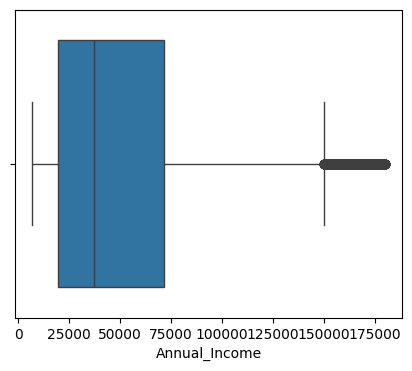



Boxplot for Monthly_Inhand_Salary


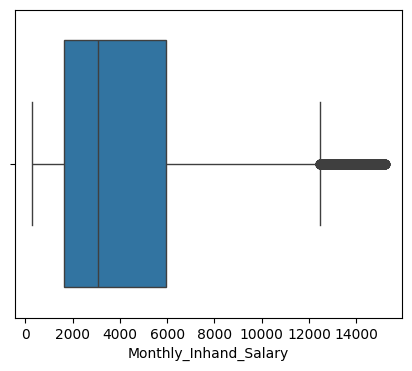



Boxplot for Outstanding_Debt


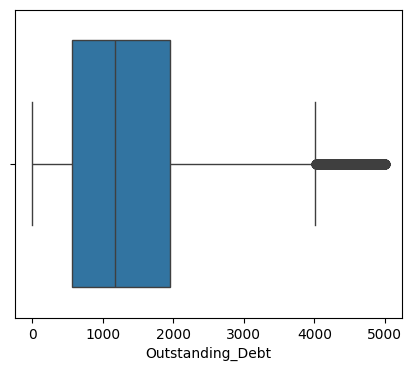



Boxplot for Total_EMI_per_month


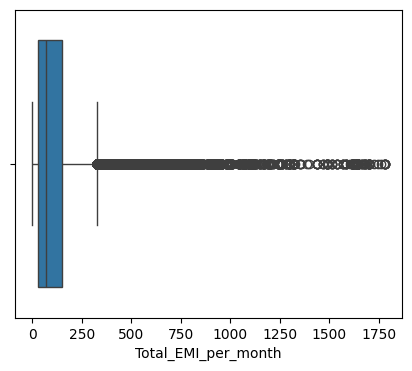



Boxplot for Amount_invested_monthly


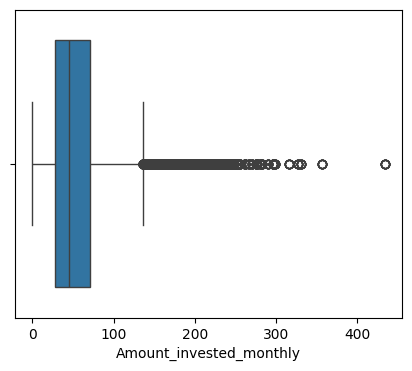



Boxplot for Monthly_Balance


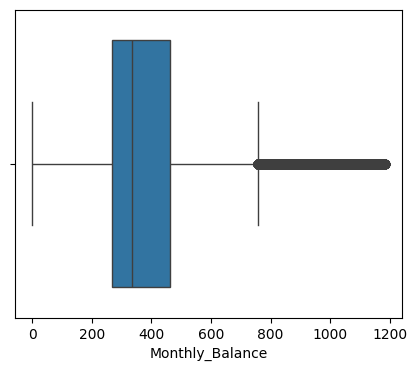

In [13]:
#Outlier Analysis
col_to_analyse = ['Annual_Income','Monthly_Inhand_Salary','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

for i in col_to_analyse:
  print('Boxplot for',i)
  plt.figure(figsize=(5,4))
  sns.boxplot(new_credit,x=new_credit[i])
  plt.show()
  print('\n')

In [14]:
#Handling outliers using z score

#Function to detect outliers
def detect_outlier(data,column,threshold=3):
  col = data[column]
  z_score = np.abs((col-np.mean(col))/np.std(col))
  return z_score > threshold

#Preserve the original data
cleaned_credit = new_credit.copy()

for i in col_to_analyse:
  outliers = detect_outlier(new_credit,i)
  cleaned_credit = cleaned_credit[~outliers]

cleaned_credit.shape

(94591, 22)

Boxplot for Annual_Income


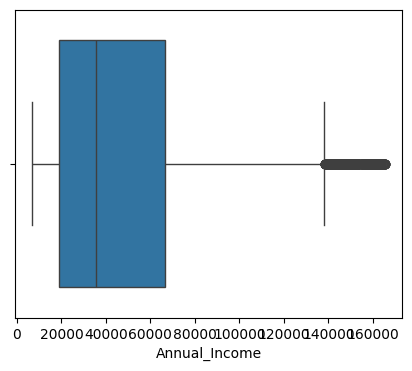



Boxplot for Monthly_Inhand_Salary


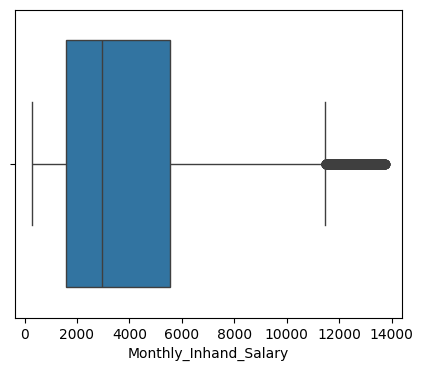



Boxplot for Outstanding_Debt


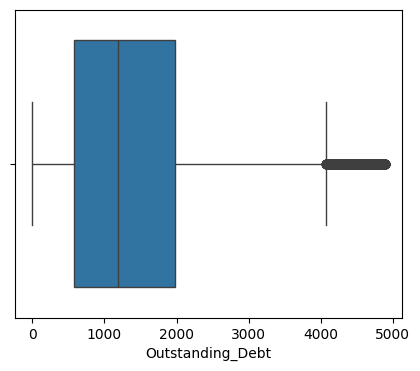



Boxplot for Total_EMI_per_month


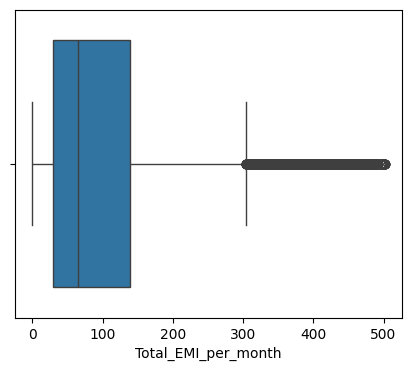



Boxplot for Amount_invested_monthly


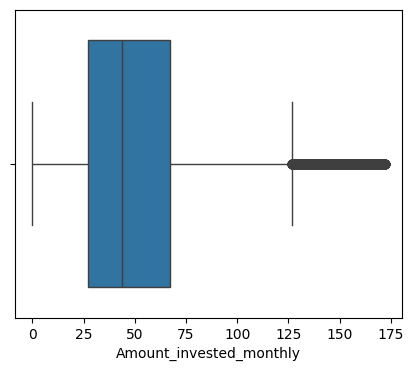



Boxplot for Monthly_Balance


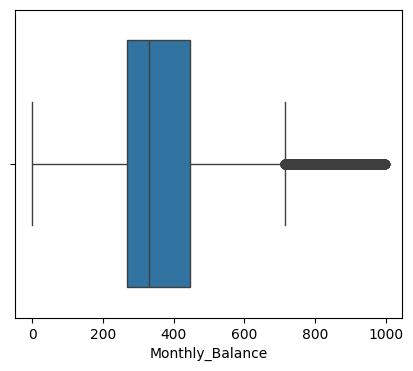

In [15]:
for i in col_to_analyse:
  print('Boxplot for',i)
  plt.figure(figsize=(5,4))
  sns.boxplot(cleaned_credit,x=cleaned_credit[i])
  plt.show()
  print('\n')

Outliers has been removed.

In [16]:
#Size of data after removing outliers
cleaned_credit.shape

(94591, 22)

### **Exploratory Data Analysis (EDA)**

### **Data description**

In [17]:
#Statistical informations of data

#Of numeric columns
cleaned_credit.describe(include=[np.number])


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000,94591.000000
mean,33.227189,46506.810308,3870.437725,5.432832,5.566227,14.738453,3.579886,21.357793,13.476726,10.545235,5.878191,1432.604696,32.156032,219.369919,95.982336,50.900024,377.114162
std,10.746229,33724.275835,2813.358961,2.576408,2.069270,8.742056,2.433351,14.849395,6.176389,6.609033,3.876253,1137.203261,5.059888,99.503445,94.065091,32.106606,176.867461
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,24.000000,19014.190000,1593.280417,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.470000,3.000000,577.400000,27.943828,142.000000,28.774536,27.268201,266.726835
50%,33.000000,35469.720000,2960.530833,6.000000,5.000000,14.000000,3.000000,18.000000,14.000000,9.460000,6.000000,1182.680000,32.172540,218.000000,64.154312,43.476160,329.705022
75%,42.000000,66755.640000,5543.416667,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,15.000000,9.000000,1977.820000,36.376100,299.000000,138.937513,67.016399,445.996692
max,56.000000,165368.560000,13731.860000,11.000000,11.000000,34.000000,9.000000,62.000000,25.000000,29.980000,17.000000,4890.070000,48.489852,404.000000,501.744212,172.032829,997.635459


In [18]:
cleaned_credit.describe(include=[object])

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,94591,94591,94591,94591,94591
unique,15,3,3,6,3
top,Lawyer,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,6725,44445,50803,28014,50612


### **Inference:**

*   Most of the individual are Lawyers.
*   Majority of individuals have a 'Standard' credit score.
*   Payment behavior of most of the individuals is 'Low_spent_Small_value_payments'.
*   There are 15 different occupation categories.





### **Data Visualization**

**How is the dataset distributed across different occupations?**

In [19]:
cleaned_credit['Occupation'].value_counts()

Lawyer           6725
Engineer         6537
Developer        6431
Architect        6412
Media_Manager    6376
Mechanic         6363
Scientist        6357
Accountant       6351
Entrepreneur     6312
Teacher          6294
Journalist       6249
Doctor           6200
Manager          6072
Musician         5969
Writer           5943
Name: Occupation, dtype: int64

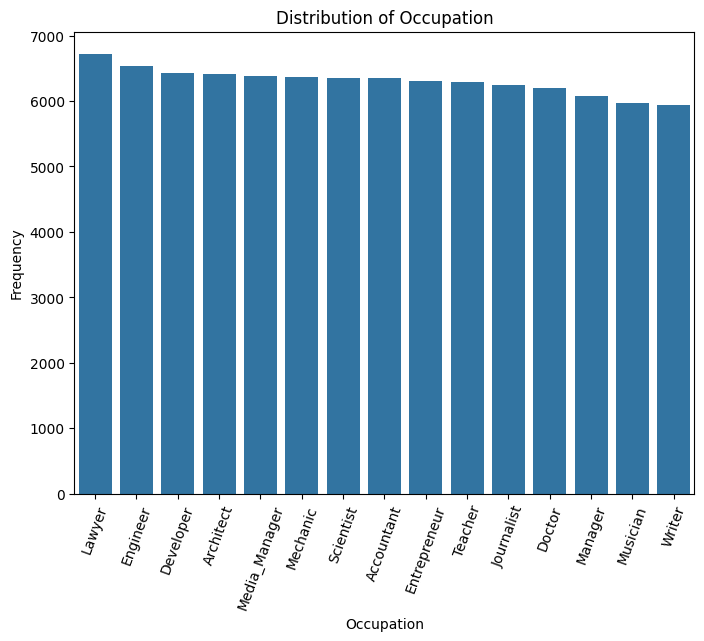

In [20]:
plt.figure(figsize = (8,6))
sns.barplot(x=cleaned_credit['Occupation'].value_counts().index, y=cleaned_credit['Occupation'].value_counts())
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Distribution of Occupation')
plt.xticks(rotation = 70)
plt.show()

Occupation is almost equally distributed.But there are more individuals in Lawyer category when compared to others.

 **What is the distribution of ages among individuals in the dataset?**

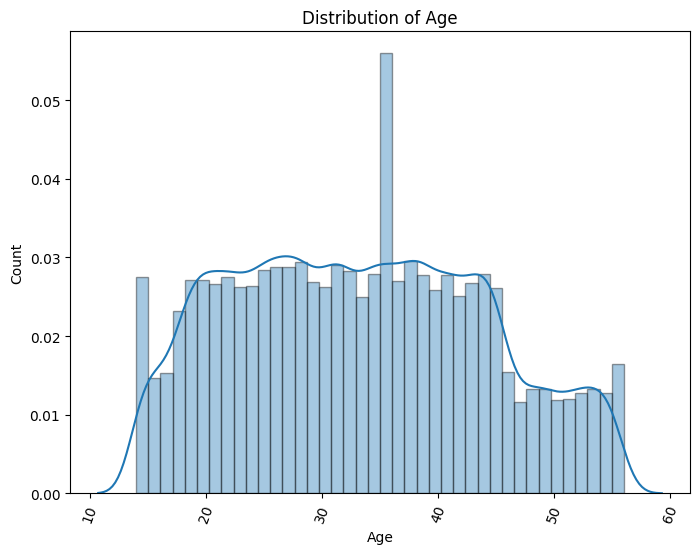

In [21]:
plt.figure(figsize = (8,6))
sns.distplot(x=cleaned_credit['Age'],kde=True,bins = 40,hist=True,hist_kws={"edgecolor": "black"})
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.xticks(rotation = 70)
plt.show()

Majority of the individuals are in the age group of 18-45.

**How many loans do individuals typically have?**

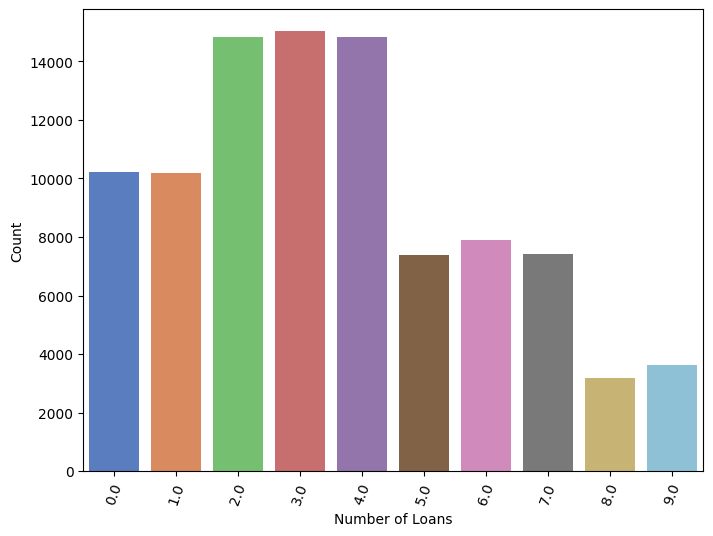

In [22]:
plt.figure(figsize = (8,6))
sns.countplot(x=cleaned_credit['Num_of_Loan'],palette='muted')
plt.xlabel('Number of Loans')
plt.ylabel('Count')
plt.xticks(rotation = 70)
plt.show()

Majority of the individuals have 0 to 4 loans.

**Is there a relationship between the number of bank accounts and the number of credit cards individuals have?**

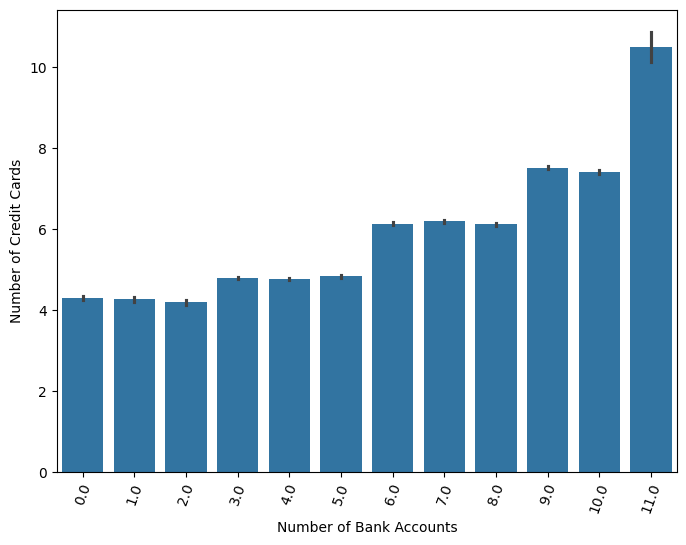

In [23]:
plt.figure(figsize = (8,6))
sns.barplot(x=cleaned_credit['Num_Bank_Accounts'], y=cleaned_credit['Num_Credit_Card'])
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Number of Credit Cards')
plt.xticks(rotation = 70)
plt.show()

Those who have more bank accounts, they have more credit cards.

**How do individuals behave in terms of payment ?**

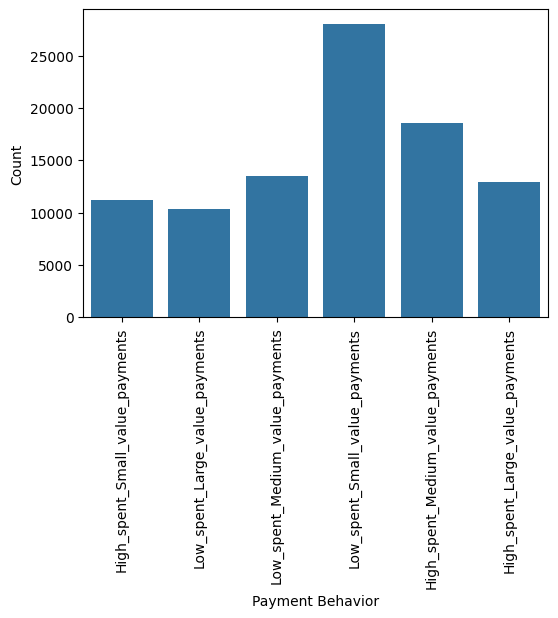

In [24]:
plt.figure(figsize = (6,4))
sns.countplot(x=cleaned_credit['Payment_Behaviour'])
plt.xlabel('Payment Behavior')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

Most of the individuals have 'Low_spent_small_value_payments' behavior.

**Does an individual's payment behavior have an observable impact on their credit score?**

<Figure size 1000x600 with 0 Axes>

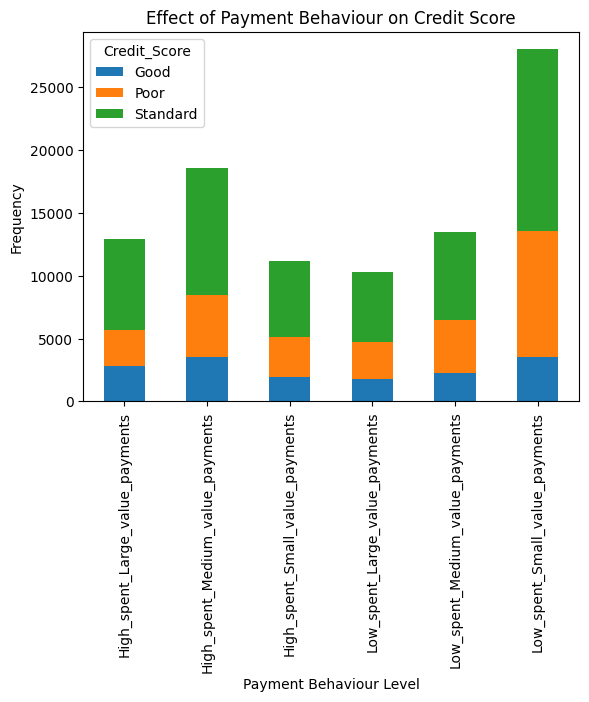

In [25]:
plt.figure(figsize=(10, 6))
pd.crosstab(cleaned_credit['Payment_Behaviour'],cleaned_credit['Credit_Score']).plot(kind='bar', stacked=True)
plt.xlabel('Payment Behaviour Level')
plt.ylabel('Frequency')
plt.title('Effect of Payment Behaviour on Credit Score')
plt.show()

**What is the distribution of credit scores among individuals?**

In [26]:
cleaned_credit['Credit_Score'].value_counts()

Standard    50612
Poor        28098
Good        15881
Name: Credit_Score, dtype: int64

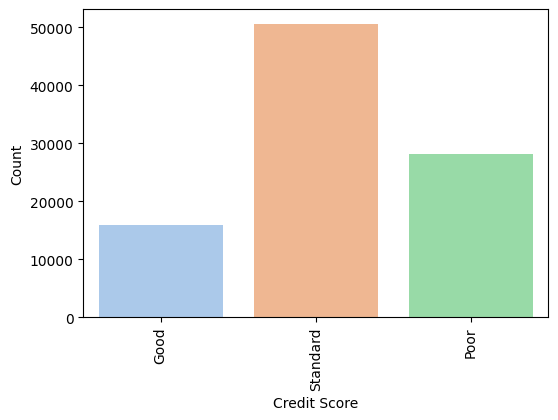

In [27]:
plt.figure(figsize = (6,4))
sns.countplot(x=cleaned_credit['Credit_Score'],palette='pastel')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

Majority of the individuals have standard as credit score.

**How the occupation and credit score of individuals are related?**

<Figure size 1000x600 with 0 Axes>

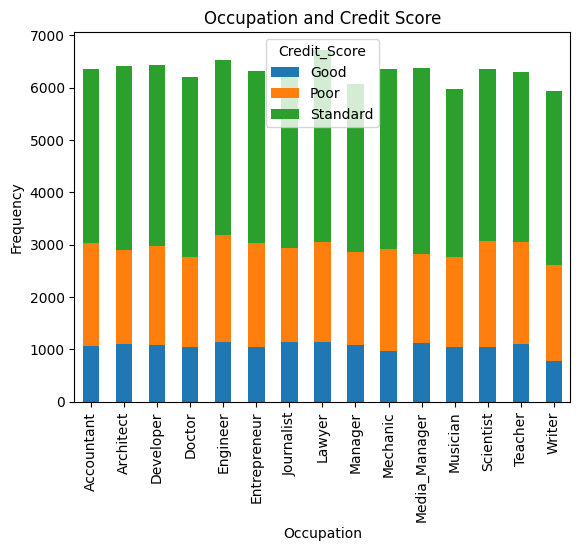

In [28]:
plt.figure(figsize=(10, 6))
pd.crosstab(cleaned_credit['Occupation'],cleaned_credit['Credit_Score']).plot(kind='bar', stacked=True)
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Occupation and Credit Score')
plt.show()

**If there is any relation between credit mix and credit score?**

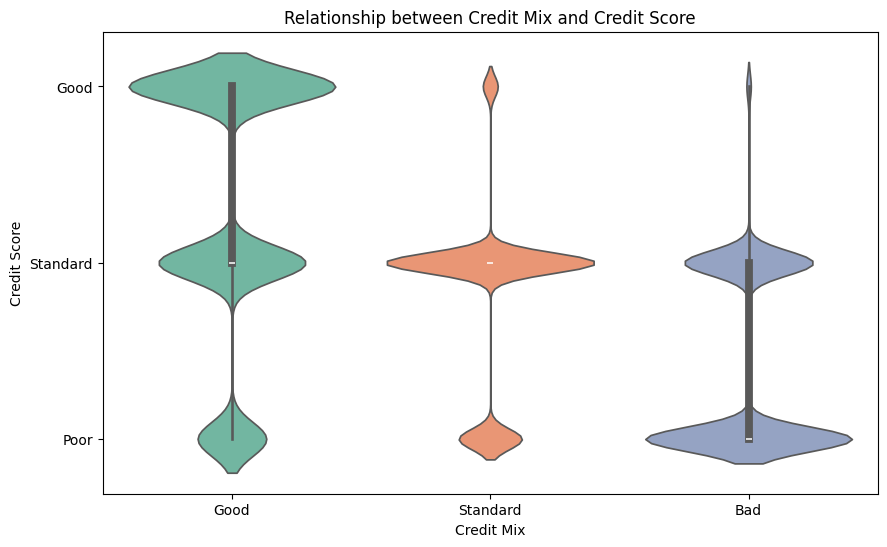

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Credit_Mix', y='Credit_Score', data=cleaned_credit, palette='Set2')
plt.title('Relationship between Credit Mix and Credit Score')
plt.xlabel('Credit Mix')
plt.ylabel('Credit Score')
plt.show()

**Is there a correlation between individuals' income levels, monthly inhand salary, and their credit score categories?**

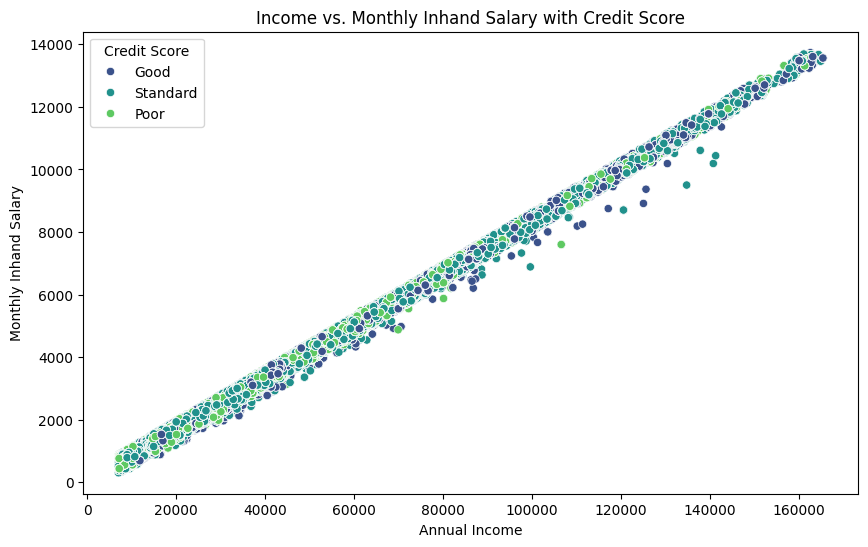

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Monthly_Inhand_Salary', hue='Credit_Score', data=cleaned_credit, palette='viridis')
plt.title('Income vs. Monthly Inhand Salary with Credit Score')
plt.xlabel('Annual Income')
plt.ylabel('Monthly Inhand Salary')
plt.legend(title='Credit Score')
plt.show()

**Correlation visualisation**

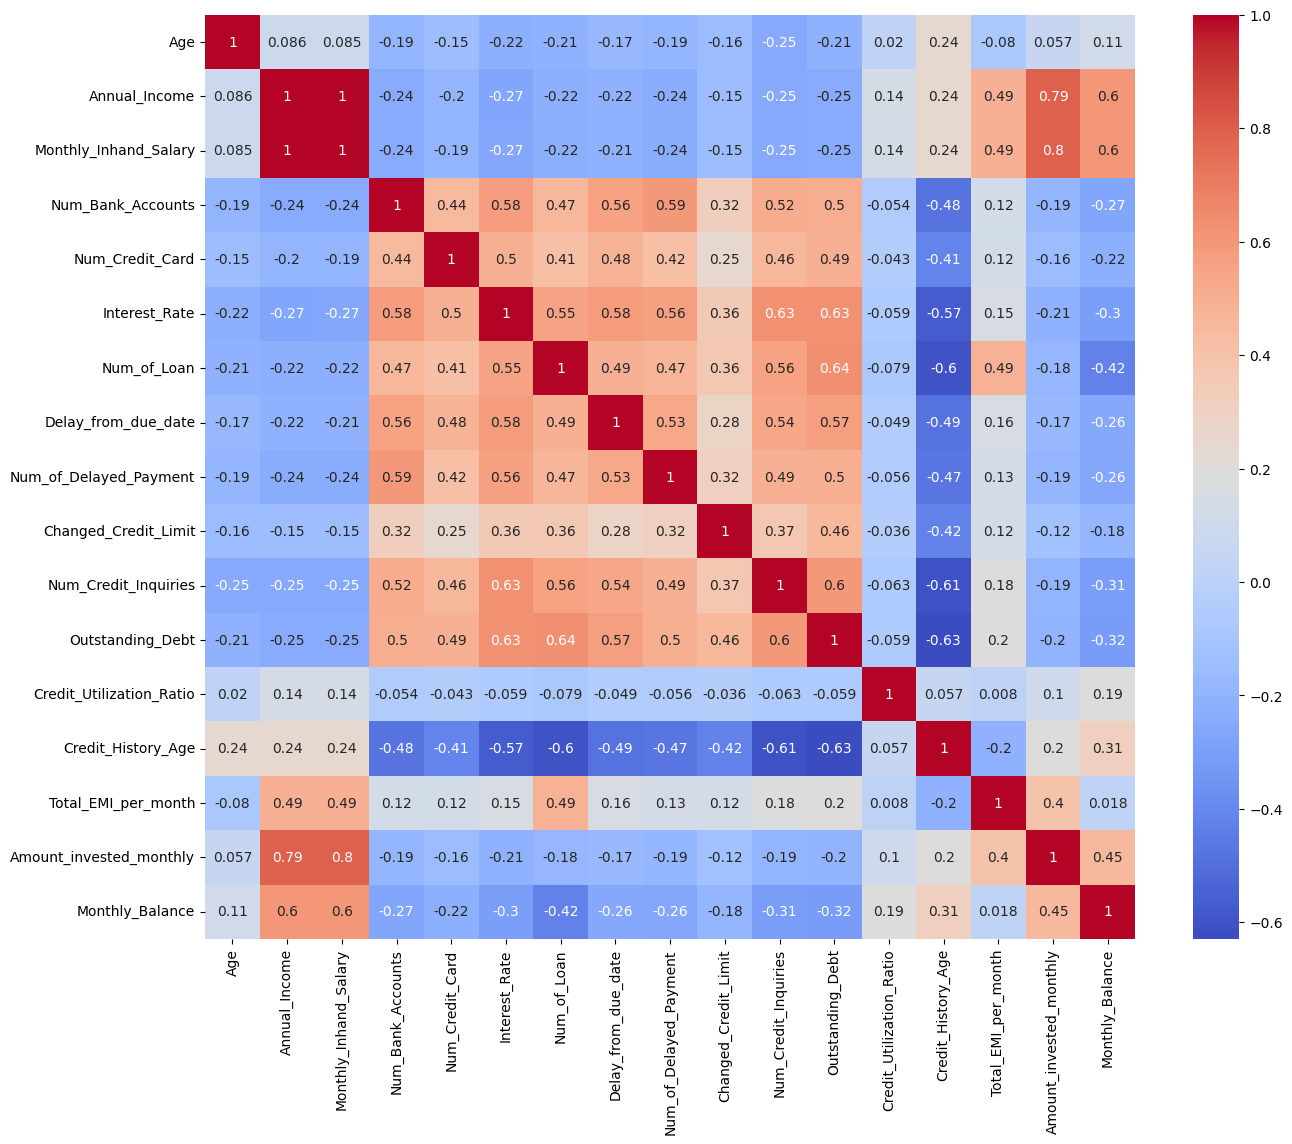

In [30]:
plt.figure(figsize=(15,12))
sns.heatmap(cleaned_credit.corr(),annot=True,cmap='coolwarm')
plt.show()

### **Creating Feature and Target Variables**

In [31]:
X = cleaned_credit.drop(['Credit_Score'],axis=1) #Feature variable
y = cleaned_credit['Credit_Score'] #Target variable

### **Data Split**

**Train,Test split**

In [32]:
X_main,X_test,y_main,y_test = train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)
print(X_main.shape)
print(X_test.shape)
print(y_main.shape)
print(y_test.shape)

(70943, 21)
(23648, 21)
(70943,)
(23648,)


**Train,Validation split**

In [33]:
X_train,X_val,y_train,y_val = train_test_split(X_main,y_main,test_size=0.25,random_state=42,shuffle=True)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(53207, 21)
(17736, 21)
(53207,)
(17736,)
